## Assignment 3 - Dimensionality Reduction

This assignment is based on content discussed in module 6 and will work with the famous MNIST dataset, which is a set of images of handwritten digits https://en.wikipedia.org/wiki/MNIST_database.
The dataset has been provided to you in a .csv file.

## Learning outcomes

- Apply a Random Forest classification algorithm to MNIST dataset
- Perform dimensionality reduction of features using PCA and compare classification on the reduced dataset to that of original one
- Apply dimensionality reduction techniques: t-SNE and LLE

## Questions (15 points total)

__Question 1 (1 point).__ Load the MNIST dataset and split it into a training set and a test set (take the first 60,000 instances for training, and the remaining 10,000 for testing).

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
# YOUR CODE HERE
df = pd.read_csv("./mnist_dataset.csv", header=0, index_col=0)

In [3]:
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,1:],df['label'], train_size=60000,random_state=11)

__Question 2 (2 points).__ Train a Random Forest classifier on the dataset and time how long it takes, then evaluate the resulting model on the test set.

In [5]:
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [30]:
# YOUR CODE HERE
time_start = time.time()

clf = RandomForestClassifier(random_state=11)
clf.fit(X_train, y_train)

print('Time elapsed: {} seconds'.format(time.time()-time_start))

Time elapsed: 37.63903188705444 seconds


In [18]:
y_predict = clf.predict(X_test)

results = classification_report(y_test, y_predict)
print(results)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       981
           1       0.98      0.98      0.98      1097
           2       0.97      0.96      0.97      1056
           3       0.96      0.95      0.95       976
           4       0.98      0.97      0.97      1002
           5       0.97      0.97      0.97       909
           6       0.97      0.98      0.98       975
           7       0.97      0.97      0.97      1044
           8       0.96      0.95      0.95       986
           9       0.95      0.95      0.95       974

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



__Question 3 (4 points).__ Next, use PCA to reduce the dataset’s dimensionality, with an explained variance ratio of 95%. Train a new Random Forest classifier on the reduced dataset and see how long it takes. Was training much faster? Next evaluate the classifier on the test set: how does it compare to the previous classifier?

In [19]:
from sklearn.decomposition import PCA

In [40]:
# YOUR CODE HERE
pca = PCA(n_components=0.95)
pca.fit(X_train)
X_train_red = pca.transform(X_train)

In [41]:
X_train.shape

(60000, 784)

In [42]:
X_train_red.shape

(60000, 154)

In [43]:
pca.explained_variance_ratio_.sum()

0.950416148558289

In [44]:
time_start = time.time()

clf_pca = RandomForestClassifier(random_state=11)
clf_pca.fit(X_train_red, y_train)

print('Time elapsed: {} seconds'.format(time.time()-time_start))

Time elapsed: 76.67835235595703 seconds


In [45]:
X_test_red = pca.transform(X_test)
y_predict = clf_pca.predict(X_test_red)

results = classification_report(y_test, y_predict)
print(results)

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       981
           1       0.98      0.97      0.97      1097
           2       0.94      0.94      0.94      1056
           3       0.92      0.93      0.93       976
           4       0.95      0.97      0.96      1002
           5       0.94      0.93      0.93       909
           6       0.97      0.98      0.97       975
           7       0.96      0.95      0.96      1044
           8       0.92      0.92      0.92       986
           9       0.94      0.93      0.93       974

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



In this case training the Random forest with the dimensional reduced data, doesn't reduce the training time, and it performs more poorly. For this reason, is better to use the hole dataset in this case.

__Question 4 (4 points).__ Use t-SNE to reduce the MNIST dataset, show result graphically.

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

In [48]:
# YOUR CODE HERE
time_start = time.time()

tsne = TSNE(n_components=2)

X_train_tsne = tsne.fit_transform(X_train)

print('Time elapsed: {} seconds'.format(time.time()-time_start))

C:\Users\bruno.gonzalez\Miniconda3\envs\pdsh\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\bruno.gonzalez\Miniconda3\envs\pdsh\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Time elapsed: 435.1126346588135 seconds


<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

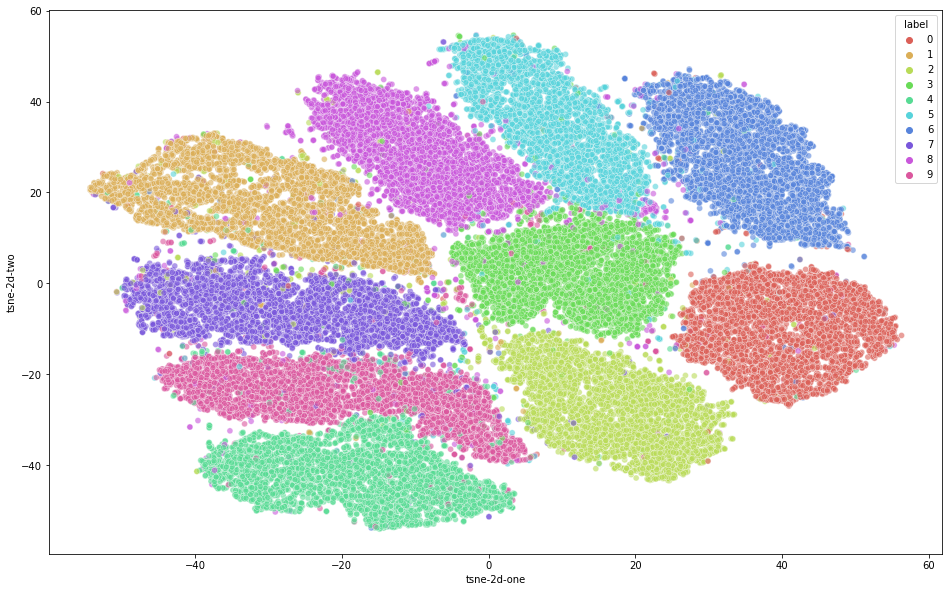

In [67]:
df_subset = pd.DataFrame(y_train, columns=['label']).copy()
df_subset['tsne-2d-one'] = X_train_tsne[:, 0]
df_subset['tsne-2d-two'] = X_train_tsne[:, 1]

plt.figure(figsize=(16,10))
sns.scatterplot(x='tsne-2d-one', y='tsne-2d-two', hue='label',
                palette=sns.color_palette('hls', 10),
                data=df_subset,
                alpha=0.6)

__Question 5 (4 points).__ Compare with other dimensionality methods: _Locally Linear Embedding_ (LLE) or _Multidimensional scaling_ (MDS).

In [69]:
from sklearn.manifold import LocallyLinearEmbedding

In [70]:
# YOR CODE HERE
time_start = time.time()

lle = LocallyLinearEmbedding(n_components=2, n_jobs=2)

X_train_lle = lle.fit_transform(X_train)

print('Time elapsed: {} seconds'.format(time.time()-time_start))

Time elapsed: 3071.216504573822 seconds


<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

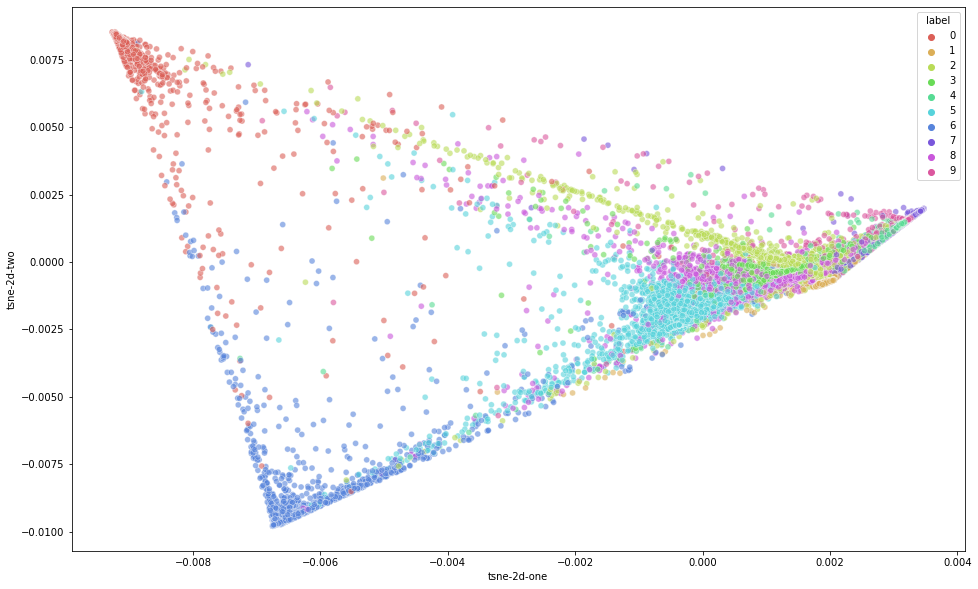

In [71]:
df_subset = pd.DataFrame(y_train, columns=['label']).copy()
df_subset['tsne-2d-one'] = X_train_lle[:, 0]
df_subset['tsne-2d-two'] = X_train_lle[:, 1]

plt.figure(figsize=(16,10))
sns.scatterplot(x='tsne-2d-one', y='tsne-2d-two', hue='label',
                palette=sns.color_palette('hls', 10),
                data=df_subset,
                alpha=0.6)

It seems that the Locally Linear Embedding doesn't extract the groups as t-SNE. For that reason t-SNE is a better dimensional reduction algorithm for this dataset.